In [ ]:
'''
[scikit learn - Clustering](https://scikit-learn.org/stable/modules/clustering.html)
[K-Means 클러스터링](https://datascienceschool.net/view-notebook/2205ad8f0c5947c08696e8927b466341/)
[Affinity Propagation](https://datascienceschool.net/view-notebook/3bd9864b09d0466995134220f6779d6d/)
[Matplotlib의 여러가지 플롯](https://datascienceschool.net/view-notebook/6e71dbff254542d9b0a054a7c98b34ec/)
[분류용 가상 데이터 생성](https://datascienceschool.net/view-notebook/ec26c797cec646e295d737c522733b15/)
[분류용 예제 데이터](https://datascienceschool.net/view-notebook/577a01e24d4f456bb5060da6e47054e1/)
[분류 성능평가](https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/)
[클러스터링을 평가하는 척도 - Mutual Information](https://yjucho1.github.io/clustering/mutual-information/)
'''

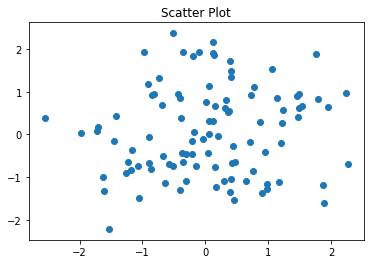

In [1]:
'''
선행 학습
scatter chart
'''
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
# plt.scatter([1,2,3,4,5], [5,4,3,2,1])
plt.show()

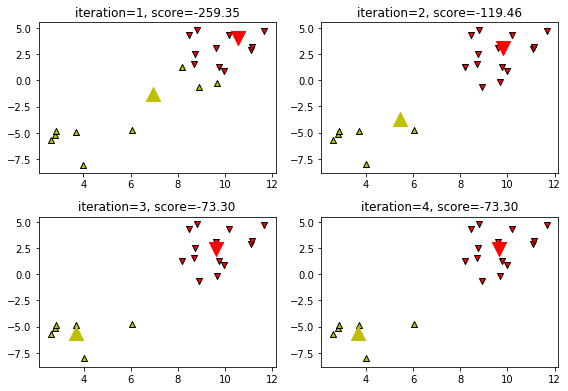

In [2]:
'''
2차원 데어터의 clustering
'''
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 분류용 가상 데이터 생성¶
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
# n_classes : 종속 변수의 클래스 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# weights : 각 클래스에 할당된 표본 수
# random_state : 난수 발생 시드
X, _ = make_blobs(n_samples=20, n_features=2, random_state=4)

def plot_KMeans(n):
    # n_clusters: 클러스터의 갯수
    # init: 초기화 방법. "random"이면 무작위, "k-means++"이면 K-Means++ 방법. 또는 각 데이터의 클러스터 라벨.
    # n_init: 초기 중심값 시도 횟수. 디폴트는 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택한다.
    # max_iter: 최대 반복 횟수.
    # random_state: 시드값.
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=8).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))
    
#     print(X)
#     print(X[model.labels_ == 0, 0])
#     print(X[model.labels_ == 0, 1])
#     print(X[model.labels_ == 1, 0])
#     print(X[model.labels_ == 1, 1])
    
plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

In [20]:
'''
다차원 데어터의 k-means clustering
'''
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

centroids = model.cluster_centers_
print(centroids)
# print(model) 

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
    plt.show()        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    
# for i in range(10):
#     show_cluster(digits.images, y_pred, i)

10


In [4]:
'''
분류 성능평가, 봐도 잘 모르겠음
'''
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]])

In [5]:
'''
clustering 성능평가
'''
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

# supervised
print("NMI:", normalized_mutual_info_score(digits.target, y_pred))
print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))

# unsupervised (cluster 의 거리로 계산, 1에 가까울 수록 좋은결과)
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

NMI: 0.7468903554645795
ARI: 0.6686991223627669
AMI: 0.7397973157276612
Silhouette Score: 0.18251916424600556


/Users/whitexozu/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/whitexozu/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [12]:
'''
성능 비교
'''
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')


성능 비교

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.19s	69432	0.602	0.650	0.625	0.465	0.621	0.146
random   	0.15s	69694	0.669	0.710	0.689	0.553	0.686	0.147
PCA-based	0.03s	70804	0.671	0.698	0.684	0.561	0.681	0.118
__________________________________________________________________________________


[[ 2.08823227  1.63051503]
 [-1.87631766 -1.3733927 ]
 [ 1.20275163 -3.95514676]
 [-0.39351312  0.61730741]
 [ 0.07842741  3.6052036 ]
 [ 4.91572968 -0.68578005]
 [-2.68646391  1.68783695]
 [-4.56251477 -0.84000357]
 [ 1.6935437  -1.51461694]
 [ 4.16883491  5.5971845 ]]


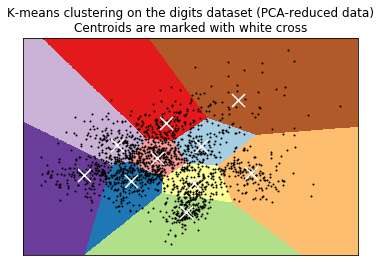

In [18]:
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()